In [1]:
#tensorflow 2.0 example on CNN
import tensorflow as tf
from tensorflow import keras as ks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
from extract import mnistExtract, onehot

xtrain, xtest, ytrain, ytest = mnistExtract('mnist.csv','mnist_test.csv')

ytrain = onehot(ytrain)
ytest = onehot(ytest)

xtrain = xtrain.reshape(20000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)

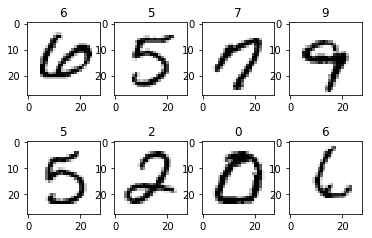

In [30]:
xtrain = xtrain.astype(np.float32)/255
xtest = xtest.astype(np.float32)/255

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(xtrain[i].reshape(28,28), cmap='binary')
    plt.title(np.argmax(ytrain[i]))


In [23]:
#model designing

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu',name='inputConv', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2, name='1stPool'))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu',name='2ndConv'))
model.add(MaxPool2D(pool_size=2, name='2ndPool'))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', name='3rdConv'))
model.add(MaxPool2D(pool_size=2, name='3rdPool'))
model.add(Flatten(name='flatLayer'))
model.add(Dense(250,activation='relu',name='FullyConn'))
model.add(Dropout(0.2,name='dropout'))
model.add(Dense(10,activation='softmax',name='output'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputConv (Conv2D)           (None, 28, 28, 16)        80        
_________________________________________________________________
1stPool (MaxPooling2D)       (None, 14, 14, 16)        0         
_________________________________________________________________
2ndConv (Conv2D)             (None, 14, 14, 32)        2080      
_________________________________________________________________
2ndPool (MaxPooling2D)       (None, 7, 7, 32)          0         
_________________________________________________________________
3rdConv (Conv2D)             (None, 7, 7, 64)          8256      
_________________________________________________________________
3rdPool (MaxPooling2D)       (None, 3, 3, 64)          0         
_________________________________________________________________
flatLayer (Flatten)          (None, 576)               0         
__________

In [24]:
#compiling the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
checkpoint = ks.callbacks.ModelCheckpoint(filepath='mnistCNN.hdf5', verbose=0, save_best_only=True)

In [25]:
model.fit(xtrain, ytrain, batch_size=1024, epochs=20, validation_split=0.2, shuffle=True, callbacks=[checkpoint], verbose=1)

Train on 16000 samples, validate on 4000 samples
Epoch 1/20
16000/16000 [==============================] - 5s 333us/step - loss: 1.7622 - acc: 0.4326 - val_loss: 1.0778 - val_acc: 0.6852
Epoch 2/20
16000/16000 [==============================] - 5s 284us/step - loss: 0.9263 - acc: 0.7071 - val_loss: 0.6877 - val_acc: 0.7748
Epoch 3/20
16000/16000 [==============================] - 4s 277us/step - loss: 0.6233 - acc: 0.7980 - val_loss: 0.4629 - val_acc: 0.8610
Epoch 4/20
16000/16000 [==============================] - 4s 277us/step - loss: 0.4887 - acc: 0.8433 - val_loss: 0.3935 - val_acc: 0.8765
Epoch 5/20
16000/16000 [==============================] - 5s 283us/step - loss: 0.3818 - acc: 0.8774 - val_loss: 0.3431 - val_acc: 0.8867
Epoch 6/20
16000/16000 [==============================] - 4s 275us/step - loss: 0.3199 - acc: 0.8984 - val_loss: 0.2481 - val_acc: 0.9227
Epoch 7/20
16000/16000 [==============================] - 4s 280us/step - loss: 0.2615 - acc: 0.9185 - val_loss: 0.2292 - v

In [26]:
model.load_weights('mnistCNN.hdf5')
model.evaluate(xtest,ytest)

10000/10000 [==============================] - 1s 92us/step


[0.08041853774180636, 0.9741]

In [27]:
model.fit(xtrain, ytrain, batch_size=1024, epochs=10, validation_split=0.2, shuffle=True, callbacks=[checkpoint], verbose=1)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 5s 288us/step - loss: 0.0997 - acc: 0.9672 - val_loss: 0.0818 - val_acc: 0.9737
Epoch 2/10
16000/16000 [==============================] - 5s 281us/step - loss: 0.0844 - acc: 0.9731 - val_loss: 0.1194 - val_acc: 0.9598
Epoch 3/10
16000/16000 [==============================] - 4s 275us/step - loss: 0.0750 - acc: 0.9758 - val_loss: 0.0775 - val_acc: 0.9737
Epoch 4/10
16000/16000 [==============================] - 4s 281us/step - loss: 0.0690 - acc: 0.9764 - val_loss: 0.0756 - val_acc: 0.9757
Epoch 5/10
16000/16000 [==============================] - 4s 277us/step - loss: 0.0718 - acc: 0.9766 - val_loss: 0.0767 - val_acc: 0.9777
Epoch 6/10
16000/16000 [==============================] - 5s 284us/step - loss: 0.0630 - acc: 0.9800 - val_loss: 0.1002 - val_acc: 0.9680
Epoch 7/10
16000/16000 [==============================] - 4s 280us/step - loss: 0.0621 - acc: 0.9806 - val_loss: 0.0668 - v

In [28]:
model.load_weights('mnistCNN.hdf5')
model.evaluate(xtest,ytest)

10000/10000 [==============================] - 1s 93us/step


[0.05952225716086104, 0.9806]